In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score ,precision_score,recall_score,f1_score, roc_auc_score, matthews_corrcoef, ConfusionMatrixDisplay, classification_report,roc_curve 

## Preprocessing: Data UnderStanding

In [2]:
data = pd.read_csv('SCMS_Delivery_History_Dataset.csv')
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [3]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

### Drop Column

In [4]:
data = data.drop(columns=['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site', 'Delivery Recorded Date',
       'First Line Designation', 'Line Item Insurance (USD)'])

### Exploratory Data Analysis

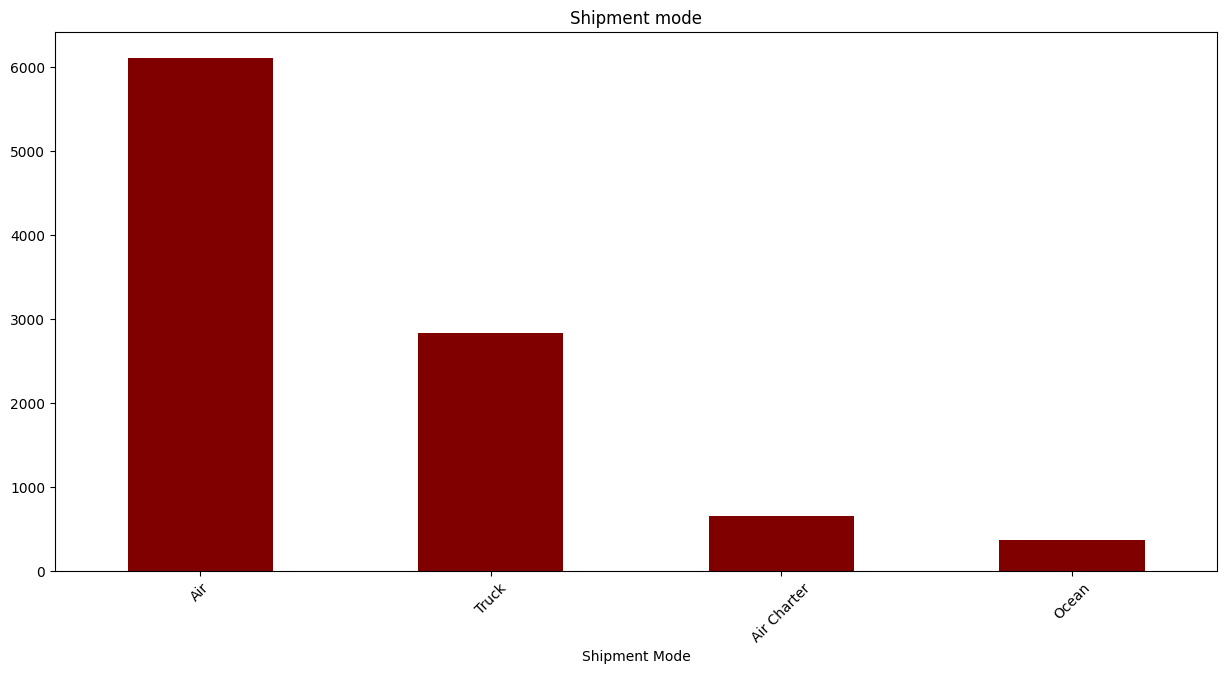

In [5]:
shipping_mode = data['Shipment Mode'].value_counts()

plt.figure(figsize=(15, 7))
shipping_mode.plot(kind='bar', title="Shipment mode", color='#800000')  # Merah maroon
plt.xticks(rotation=45)
plt.show()


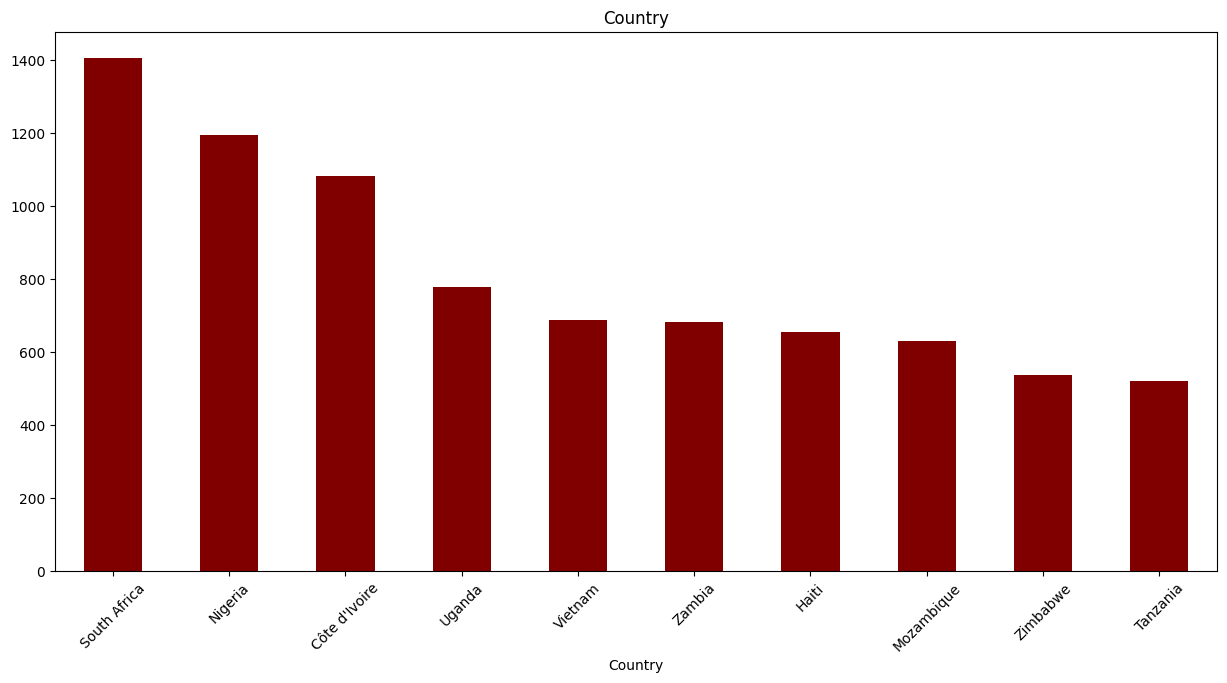

In [6]:
Country = data['Country'].value_counts().head(10)

plt.figure(figsize=(15, 7))
Country.plot(kind='bar', title="Country", color='#800000')  # Merah maroon
plt.xticks(rotation=45)
plt.show()


### Feature Engineering

In [7]:
# Kamus negara dan benua
country_to_continent = {
    "Côte d'Ivoire": 'Africa',
    'Vietnam': 'Asia',
    'Nigeria': 'Africa',
    'Zambia': 'Africa',
    'Tanzania': 'Africa',
    'Rwanda': 'Africa',
    'Haiti': 'North America',
    'Zimbabwe': 'Africa',
    'Ethiopia': 'Africa',
    'South Africa': 'Africa',
    'Guyana': 'South America',
    'Namibia': 'Africa',
    'Botswana': 'Africa',
    'Mozambique': 'Africa',
    'Kenya': 'Africa',
    'Kazakhstan': 'Asia',
    'Uganda': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Senegal': 'Africa',
    'Benin': 'Africa',
    'Lesotho': 'Africa',
    'Pakistan': 'Asia',
    'Swaziland': 'Africa',
    'Ghana': 'Africa',
    'Angola': 'Africa',
    'Lebanon': 'Asia',
    'Sierra Leone': 'Africa',
    'Cameroon': 'Africa',
    'South Sudan': 'Africa',
    'Burundi': 'Africa',
    'Dominican Republic': 'North America',
    'Malawi': 'Africa',
    'Congo, DRC': 'Africa',
    'Sudan': 'Africa',
    'Mali': 'Africa',
    'Guatemala': 'North America',
    'Togo': 'Africa',
    'Afghanistan': 'Asia',
    'Liberia': 'Africa',
    'Burkina Faso': 'Africa',
    'Guinea': 'Africa',
    'Libya': 'Africa',
    'Belize': 'North America',
}
# Misalnya, data adalah DataFrame Anda
data['Continent'] = data['Country'].map(country_to_continent)

### Feature Engineering

In [8]:
# Mengonversi kedua kolom ke datetime
data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'])
data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'])
# Menghitung selisih hari
data['Days Difference'] = (data['Delivered to Client Date'] - data['Scheduled Delivery Date']).dt.days

C:\Users\reyha\AppData\Local\Temp\ipykernel_6224\3624830068.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'])
C:\Users\reyha\AppData\Local\Temp\ipykernel_6224\3624830068.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'])


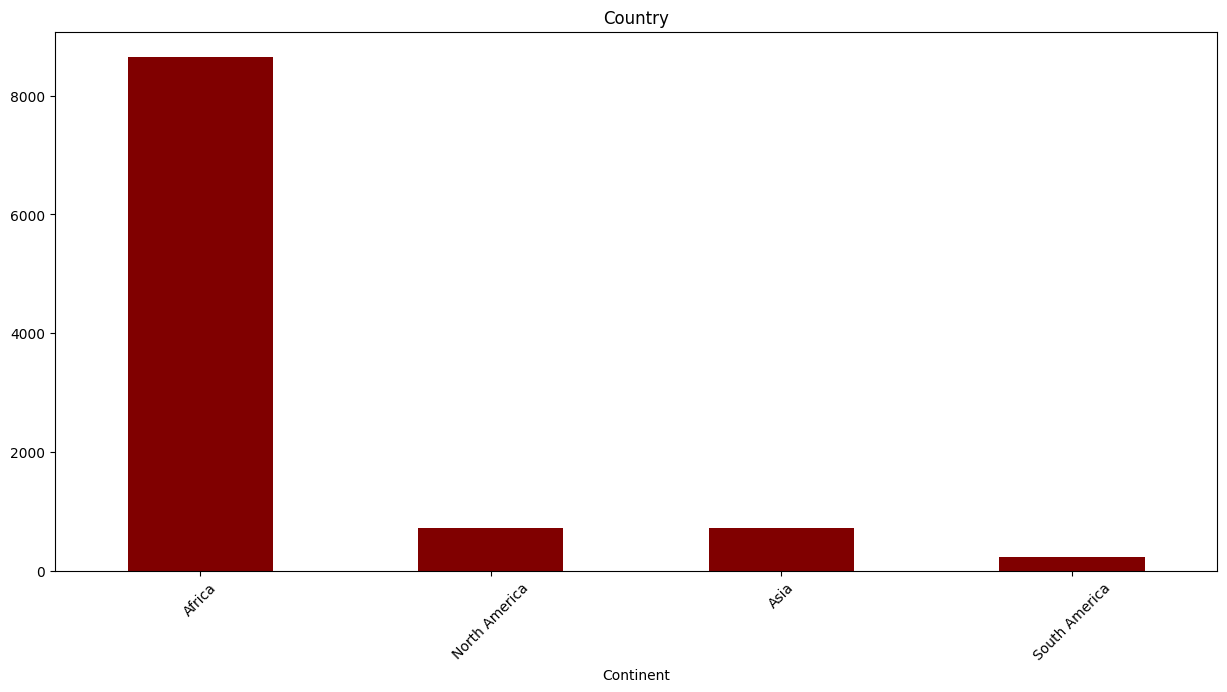

In [9]:
continent = data['Continent'].value_counts().head(10)

plt.figure(figsize=(15, 7))
continent.plot(kind='bar', title="Country", color='#800000')  # Merah maroon
plt.xticks(rotation=45)
plt.show()


In [10]:
data

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Weight (Kilograms),Freight Cost (USD),Continent,Days Difference
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2006-06-02,2006-06-02,13,780.34,Africa,0
1,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-11-14,2006-11-14,358,4521.5,Asia,0
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,2006-08-27,2006-08-27,171,1653.78,Africa,0
3,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-09-01,2006-09-01,1855,16007.06,Asia,0
4,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-08-11,2006-08-11,7590,45450.08,Asia,0
...,...,...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,2015-07-31,2015-07-15,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),Africa,-16
10320,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,2015-07-31,2015-08-06,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),Africa,6
10321,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,2015-08-31,2015-08-25,Weight Captured Separately,Freight Included in Commodity Cost,Africa,-6
10322,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,2015-09-09,2015-08-04,1392,Freight Included in Commodity Cost,Africa,-36


In [11]:
data = data.drop(columns=['Scheduled Delivery Date', 'Delivered to Client Date'])
data

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Weight (Kilograms),Freight Cost (USD),Continent,Days Difference
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,13,780.34,Africa,0
1,Vietnam,PMO - US,Direct Drop,EXW,Air,358,4521.5,Asia,0
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,171,1653.78,Africa,0
3,Vietnam,PMO - US,Direct Drop,EXW,Air,1855,16007.06,Asia,0
4,Vietnam,PMO - US,Direct Drop,EXW,Air,7590,45450.08,Asia,0
...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),Africa,-16
10320,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),Africa,6
10321,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,Weight Captured Separately,Freight Included in Commodity Cost,Africa,-6
10322,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,1392,Freight Included in Commodity Cost,Africa,-36


### Preprocessing: Data Preprocessing

### Converting data type

In [12]:
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')

### Missing Value Handling

In [13]:
print(data.isna().sum())

Country                  0
Managed By               0
Fulfill Via              0
Vendor INCO Term         0
Shipment Mode          360
Weight (Kilograms)    3952
Freight Cost (USD)    4126
Continent                0
Days Difference          0
dtype: int64


In [14]:
data['Weight (Kilograms)'] = data['Weight (Kilograms)'].fillna(data['Weight (Kilograms)'].median())
data['Freight Cost (USD)'] = data['Freight Cost (USD)'].fillna(data['Freight Cost (USD)'].median())
print(data.isna().sum())

Country                 0
Managed By              0
Fulfill Via             0
Vendor INCO Term        0
Shipment Mode         360
Weight (Kilograms)      0
Freight Cost (USD)      0
Continent               0
Days Difference         0
dtype: int64


In [15]:
data = data.dropna()
print(data.isna().sum())

Country               0
Managed By            0
Fulfill Via           0
Vendor INCO Term      0
Shipment Mode         0
Weight (Kilograms)    0
Freight Cost (USD)    0
Continent             0
Days Difference       0
dtype: int64


In [16]:
data

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Weight (Kilograms),Freight Cost (USD),Continent,Days Difference
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,13.0,780.340,Africa,0
1,Vietnam,PMO - US,Direct Drop,EXW,Air,358.0,4521.500,Asia,0
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,171.0,1653.780,Africa,0
3,Vietnam,PMO - US,Direct Drop,EXW,Air,1855.0,16007.060,Asia,0
4,Vietnam,PMO - US,Direct Drop,EXW,Air,7590.0,45450.080,Asia,0
...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,1047.0,5869.655,Africa,-16
10320,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,1047.0,5869.655,Africa,6
10321,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,1047.0,5869.655,Africa,-6
10322,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,1392.0,5869.655,Africa,-36


In [17]:
data.columns

Index(['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Continent', 'Days Difference'],
      dtype='object')

### Data Encoding

In [18]:
columns_to_encode = ['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'Continent']

# Membuat dictionary untuk menyimpan LabelEncoder masing-masing kolom
encoders = {}

# Encoding dan menyimpan LabelEncoder untuk setiap kolom
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    encoders[column] = le  # Simpan label_encoder untuk kolom ini

# Melihat representasi angka untuk setiap kolom
for column, encoder in encoders.items():
    print(f"Mapping untuk kolom '{column}':")
    for idx, class_ in enumerate(encoder.classes_):
        print(f"{idx} -> {class_}")
    print("\n")

Mapping untuk kolom 'Country':
0 -> Afghanistan
1 -> Angola
2 -> Belize
3 -> Benin
4 -> Botswana
5 -> Burkina Faso
6 -> Burundi
7 -> Cameroon
8 -> Congo, DRC
9 -> Côte d'Ivoire
10 -> Dominican Republic
11 -> Ethiopia
12 -> Ghana
13 -> Guatemala
14 -> Guinea
15 -> Guyana
16 -> Haiti
17 -> Kazakhstan
18 -> Kenya
19 -> Kyrgyzstan
20 -> Lebanon
21 -> Lesotho
22 -> Liberia
23 -> Libya
24 -> Malawi
25 -> Mali
26 -> Mozambique
27 -> Namibia
28 -> Nigeria
29 -> Pakistan
30 -> Rwanda
31 -> Senegal
32 -> Sierra Leone
33 -> South Africa
34 -> South Sudan
35 -> Sudan
36 -> Swaziland
37 -> Tanzania
38 -> Togo
39 -> Uganda
40 -> Vietnam
41 -> Zambia
42 -> Zimbabwe


Mapping untuk kolom 'Managed By':
0 -> Ethiopia Field Office
1 -> Haiti Field Office
2 -> PMO - US
3 -> South Africa Field Office


Mapping untuk kolom 'Fulfill Via':
0 -> Direct Drop
1 -> From RDC


Mapping untuk kolom 'Vendor INCO Term':
0 -> CIF
1 -> CIP
2 -> DAP
3 -> DDP
4 -> DDU
5 -> EXW
6 -> FCA
7 -> N/A - From RDC


Mapping untuk 

C:\Users\reyha\AppData\Local\Temp\ipykernel_6224\1172749055.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
C:\Users\reyha\AppData\Local\Temp\ipykernel_6224\1172749055.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
C:\Users\reyha\AppData\Local\Temp\ipykernel_6224\1172749055.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [19]:
data

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Weight (Kilograms),Freight Cost (USD),Continent,Days Difference
0,9,2,0,5,0,13.0,780.340,0,0
1,40,2,0,5,0,358.0,4521.500,1,0
2,9,2,0,6,0,171.0,1653.780,0,0
3,40,2,0,5,0,1855.0,16007.060,1,0
4,40,2,0,5,0,7590.0,45450.080,1,0
...,...,...,...,...,...,...,...,...,...
10319,42,2,1,7,3,1047.0,5869.655,0,-16
10320,9,2,1,7,3,1047.0,5869.655,0,6
10321,41,2,1,7,3,1047.0,5869.655,0,-6
10322,42,2,1,7,3,1392.0,5869.655,0,-36


### Correlation Matrix

In [20]:
correlation_matrix = data.corr()
Shipment_corr = correlation_matrix['Shipment Mode'].sort_values(ascending=True)
print(Shipment_corr)

Continent            -0.258624
Days Difference      -0.086267
Freight Cost (USD)   -0.039426
Vendor INCO Term     -0.011583
Weight (Kilograms)    0.075314
Managed By            0.106326
Fulfill Via           0.198549
Country               0.267103
Shipment Mode         1.000000
Name: Shipment Mode, dtype: float64


In [21]:
x = data.drop(columns=['Shipment Mode'])
y = data['Shipment Mode']

### Without Imbalanced Handling

In [22]:
param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'MLP': {
        'hidden_layer_sizes': [(512, 256, 128, 64, 32), (256, 128, 64, 32), (128, 64, 32)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}
# Melatih model dengan hyperparameter tuning untuk beberapa skenario
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=500),
    'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

In [23]:
split_sizes = [0.6, 0.7, 0.8, 0.9]

for split_size in split_sizes:
    print(f"\n--- Split Size: {int(split_size*100)} : {int((1-split_size)*100)} ---")
    
    # Memisahkan data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=(1 - split_size), random_state=42)

    best_models = {}

    for model_name, model in models.items():
        print(f"Optimizing {model_name}...")
        grid_search = GridSearchCV(model, param_grids[model_name], scoring='f1_weighted', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Menghitung metrik untuk setiap model terbaik
    for model_name, model in best_models.items():
        y_pred = model.predict(X_test)

        # Hitung metrik
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        
        print(f"--- {model_name} ---")
        print(f"Akurasi: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print("-" * 30)


--- Split Size: 60 : 40 ---
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Optimizing Random Forest...
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Optimizing MLP...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (512, 256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [08:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.8712995484194681
Precision: 0.8709597290056897
Recall: 0.8712995484194681
F1 Score: 0.8710514879691268
------------------------------
--- Random Forest ---
Akurasi: 0.8933768188660312
Precision: 0.8928079530750795
Recall: 0.8933768188660312
F1 Score: 0.8926636432817334
------------------------------
--- MLP ---
Akurasi: 0.6633216256899147
Precision: 0.6332549333928994
Recall: 0.6633216256899147
F1 Score: 0.6032417047828914
------------------------------
--- XGBoost ---
Akurasi: 0.8963873557451079
Precision: 0.8957139575244168
Recall: 0.8963873557451079
F1 Score: 0.8958284214964907
------------------------------
--- AdaBoost ---
Akurasi: 0.6693426994480682
Precision: 0.6792752700116723
Recall: 0.6693426994480682
F1 Score: 0.6294003181943014
------------------------------

--- Split Size: 70 : 30 ---
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entro

c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
27 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [08:47:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.8819397993311037
Precision: 0.8813276442442952
Recall: 0.8819397993311037
F1 Score: 0.8815061236623463
------------------------------
--- Random Forest ---
Akurasi: 0.8953177257525083
Precision: 0.8949586534663965
Recall: 0.8953177257525083
F1 Score: 0.8948788946975774
------------------------------
--- MLP ---
Akurasi: 0.5157190635451505
Precision: 0.6865909700138787
Recall: 0.5157190635451505
F1 Score: 0.53796526767351
------------------------------
--- XGBoost ---
Akurasi: 0.8933110367892977
Precision: 0.8928519832967575
Recall: 0.8933110367892977
F1 Score: 0.8928793060933895
------------------------------
--- AdaBoost ---
Akurasi: 0.7050167224080267
Precision: 0.7176902249933843
Recall: 0.7050167224080267
F1 Score: 0.6665539791598006
------------------------------

--- Split Size: 80 : 19 ---
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 

c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [09:02:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.8941294530858003
Precision: 0.8932867208739631
Recall: 0.8941294530858003
F1 Score: 0.8934822664425056
------------------------------
--- Random Forest ---
Akurasi: 0.8946312092323131
Precision: 0.8941446240486589
Recall: 0.8946312092323131
F1 Score: 0.8939942045557953
------------------------------
--- MLP ---
Akurasi: 0.6452584044154541
Precision: 0.588575226148839
Recall: 0.6452584044154541
F1 Score: 0.5774238078298943
------------------------------
--- XGBoost ---
Akurasi: 0.8931259407927747
Precision: 0.8923879634814377
Recall: 0.8931259407927747
F1 Score: 0.8924594405097431
------------------------------
--- AdaBoost ---
Akurasi: 0.708981435022579
Precision: 0.7250612148698565
Recall: 0.708981435022579
F1 Score: 0.6715608729291184
------------------------------

--- Split Size: 90 : 9 ---
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy',

c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
27 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (512, 256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [09:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.8986960882647944
Precision: 0.8992372562823046
Recall: 0.8986960882647944
F1 Score: 0.8989132836380027
------------------------------
--- Random Forest ---
Akurasi: 0.8996990972918756
Precision: 0.8998880489976226
Recall: 0.8996990972918756
F1 Score: 0.8997311599133063
------------------------------
--- MLP ---
Akurasi: 0.6529588766298897
Precision: 0.6293203345123813
Recall: 0.6529588766298897
F1 Score: 0.5590883660999911
------------------------------
--- XGBoost ---
Akurasi: 0.8936810431293881
Precision: 0.8937274344537667
Recall: 0.8936810431293881
F1 Score: 0.8936885079480865
------------------------------
--- AdaBoost ---
Akurasi: 0.7131394182547643
Precision: 0.7327701494520413
Recall: 0.7131394182547643
F1 Score: 0.672531886901872
------------------------------


### Oversampling

In [24]:
# Parameter grids untuk hyperparameter tuning
param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'MLP': {
        'hidden_layer_sizes': [(512, 256, 128, 64, 32), (256, 128, 64, 32), (128, 64, 32)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}

# Melatih model dengan hyperparameter tuning untuk beberapa skenario
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=500),
    'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

In [25]:
split_sizes = [0.6, 0.7, 0.8, 0.9]

for split_size in split_sizes:
    print(f"\n--- Split Size: {int(split_size*100)} : {int((1-split_size)*100)} ---")
    
    # Memisahkan data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=(1 - split_size), random_state=42)

    # Over-sampling menggunakan SMOTE pada data training
    smote = SMOTE(random_state=42)
    x_smote, y_smote = smote.fit_resample(X_train, y_train)

    print(f"Jumlah data sebelum SMOTE: {sum(y_train == 3)} kelas 3, {sum(y_train == 2)} kelas 2, {sum(y_train == 1)} kelas 1, {sum(y_train == 0)} kelas 0")
    print(f"Jumlah data setelah SMOTE: {sum(y_smote == 3)} kelas 3, {sum(y_smote == 2)} kelas 2, {sum(y_smote == 1)} kelas 1, {sum(y_smote == 0)} kelas 0")

    best_models = {}

    for model_name, model in models.items():
        print(f"Optimizing {model_name}...")
        grid_search = GridSearchCV(model, param_grids[model_name], scoring='f1_weighted', cv=5, n_jobs=-1)
        grid_search.fit(x_smote, y_smote)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Menghitung metrik untuk setiap model terbaik
    for model_name, model in best_models.items():
        y_pred = model.predict(X_test)

        # Hitung metrik
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        
        print(f"--- {model_name} ---")
        print(f"Akurasi: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print("-" * 30)


--- Split Size: 60 : 40 ---
Jumlah data sebelum SMOTE: 1738 kelas 3, 220 kelas 2, 387 kelas 1, 3633 kelas 0
Jumlah data setelah SMOTE: 3633 kelas 3, 3633 kelas 2, 3633 kelas 1, 3633 kelas 0
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Optimizing Random Forest...
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Optimizing MLP...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (512, 256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [09:46:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.8625188158554943
Precision: 0.8670403470701197
Recall: 0.8625188158554943
F1 Score: 0.8640003640853662
------------------------------
--- Random Forest ---
Akurasi: 0.8760662318113397
Precision: 0.8820439035962798
Recall: 0.8760662318113397
F1 Score: 0.8774650170181939
------------------------------
--- MLP ---
Akurasi: 0.7463622679377823
Precision: 0.8005996730367156
Recall: 0.7463622679377823
F1 Score: 0.7604582196541619
------------------------------
--- XGBoost ---
Akurasi: 0.8790767686904165
Precision: 0.8839450575758624
Recall: 0.8790767686904165
F1 Score: 0.8804153930751053
------------------------------
--- AdaBoost ---
Akurasi: 0.6121424987456097
Precision: 0.7418073464904048
Recall: 0.6121424987456097
F1 Score: 0.6534386543148157
------------------------------

--- Split Size: 70 : 30 ---
Jumlah data sebelum SMOTE: 2014 kelas 3, 260 kelas 2, 445 kelas 1, 4255 kelas 0
Jum

c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (512, 256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.8595317725752508
Precision: 0.8667300600594005
Recall: 0.8595317725752508
F1 Score: 0.8614663730789653
------------------------------
--- Random Forest ---
Akurasi: 0.8762541806020067
Precision: 0.8829973453852209
Recall: 0.8762541806020067
F1 Score: 0.8777545668024331
------------------------------
--- MLP ---
Akurasi: 0.6826086956521739
Precision: 0.7771302779631094
Recall: 0.6826086956521739
F1 Score: 0.7121940775384767
------------------------------
--- XGBoost ---
Akurasi: 0.8732441471571907
Precision: 0.8788281307178213
Recall: 0.8732441471571907
F1 Score: 0.8745896736825604
------------------------------
--- AdaBoost ---
Akurasi: 0.640133779264214
Precision: 0.6752175146023072
Recall: 0.640133779264214
F1 Score: 0.6475301800201607
------------------------------

--- Split Size: 80 : 19 ---
Jumlah data sebelum SMOTE: 2283 kelas 3, 294 kelas 2, 516 kelas 1, 4878 kelas 0
Jumla

c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
21 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [10:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.8615153035624686
Precision: 0.8690432230460544
Recall: 0.8615153035624686
F1 Score: 0.8633021019095525
------------------------------
--- Random Forest ---
Akurasi: 0.8765679879578525
Precision: 0.8836589189877887
Recall: 0.8765679879578525
F1 Score: 0.8778695379544839
------------------------------
--- MLP ---
Akurasi: 0.6437531359759157
Precision: 0.7545539746134661
Recall: 0.6437531359759157
F1 Score: 0.6731473453126935
------------------------------
--- XGBoost ---
Akurasi: 0.8760662318113397
Precision: 0.8814852981405384
Recall: 0.8760662318113397
F1 Score: 0.8771776451093749
------------------------------
--- AdaBoost ---
Akurasi: 0.6603110888108379
Precision: 0.6968248521778132
Recall: 0.6603110888108379
F1 Score: 0.6681334743585958
------------------------------

--- Split Size: 90 : 9 ---
Jumlah data sebelum SMOTE: 2556 kelas 3, 339 kelas 2, 583 kelas 1, 5489 kelas 0
Juml

c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
21 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (512, 256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:37:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.872617853560682
Precision: 0.8833142105837247
Recall: 0.872617853560682
F1 Score: 0.8751937279841324
------------------------------
--- Random Forest ---
Akurasi: 0.8796389167502507
Precision: 0.8891253663272258
Recall: 0.8796389167502507
F1 Score: 0.8815596057449381
------------------------------
--- MLP ---
Akurasi: 0.8064192577733199
Precision: 0.8467415797750275
Recall: 0.8064192577733199
F1 Score: 0.8148965627562352
------------------------------
--- XGBoost ---
Akurasi: 0.8846539618856569
Precision: 0.8924345144519243
Recall: 0.8846539618856569
F1 Score: 0.8863210743872897
------------------------------
--- AdaBoost ---
Akurasi: 0.6349047141424273
Precision: 0.6800206324329915
Recall: 0.6349047141424273
F1 Score: 0.6443266319176876
------------------------------


### Undersampling

In [26]:
param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'MLP': {
        'hidden_layer_sizes': [(512, 256, 128, 64, 32), (256, 128, 64, 32), (128, 64, 32)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}

# Melatih model dengan hyperparameter tuning untuk beberapa skenario
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=500),
    'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

In [27]:
split_sizes = [0.6, 0.7, 0.8, 0.9]

for split_size in split_sizes:
    print(f"\n--- Split Size: {int(split_size*100)} : {int((1-split_size)*100)} ---")
    
    # Memisahkan data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=(1 - split_size), random_state=42)

    # Under-sampling menggunakan RandomUnderSampler pada data training
    under_sampler = RandomUnderSampler(random_state=42)
    x_under, y_under = under_sampler.fit_resample(X_train, y_train)

    print(f"Jumlah data sebelum Under-sampling: {sum(y_train == 3)} kelas 3, {sum(y_train == 2)} kelas 2, {sum(y_train == 1)} kelas 1, {sum(y_train == 0)} kelas 0")
    print(f"Jumlah data setelah Under-sampling: {sum(y_under == 3)} kelas 3, {sum(y_under == 2)} kelas 2, {sum(y_under == 1)} kelas 1, {sum(y_under == 0)} kelas 0")

    best_models = {}

    for model_name, model in models.items():
        print(f"Optimizing {model_name}...")
        grid_search = GridSearchCV(model, param_grids[model_name], scoring='f1_weighted', cv=5, n_jobs=-1)
        grid_search.fit(x_under, y_under)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Menghitung metrik untuk setiap model terbaik
    for model_name, model in best_models.items():
        y_pred = model.predict(X_test)

        # Hitung metrik
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        mcc = matthews_corrcoef(y_test, y_pred)
        
        print(f"--- {model_name} ---")
        print(f"Akurasi: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"MCC: {mcc}")
        print("-" * 30)


--- Split Size: 60 : 40 ---
Jumlah data sebelum Under-sampling: 1738 kelas 3, 220 kelas 2, 387 kelas 1, 3633 kelas 0
Jumlah data setelah Under-sampling: 220 kelas 3, 220 kelas 2, 220 kelas 1, 220 kelas 0
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
Optimizing Random Forest...
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Optimizing MLP...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
--- Decision Tree ---
Akurasi: 0.7849974912192674
Precision: 0.8309392485185674
Recall: 0.7849974912192674
F1 Score: 0.7966171880716992
MCC: 0.6486140937187268
------------------------------
--- Random Forest ---
Akurasi: 0.8110888108379327
Precision: 0.8484602419379444
Recall: 0.8110888108379327
F1 Score: 0.8160624053676361
MCC: 0.6954572318269878
------------------------------
--- MLP ---
Akurasi: 0.5689914701455093
Precision: 0.6035816676490893
Recall: 0.5689914701455093
F1 Score: 0.5099384394201908
MCC: 0.16981284364722038
------------------------------
--- XGBoost ---
Akurasi: 0.8070747616658304
Precision: 0.8480891979832597
Recall: 0.8070747616658304
F1 Score: 0.8145165146597687
MCC: 0.6885100096709076
------------------------------
--- AdaBoost ---
Akurasi: 0.5220772704465629
Precision: 0.7240144184614248
Recall: 0.5220772704465629
F1 Score: 0.5800830000830165
MCC: 0.3512560466384425
----------------------

c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
27 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.8090301003344481
Precision: 0.834582057892838
Recall: 0.8090301003344481
F1 Score: 0.8150540084444664
MCC: 0.6751752544797043
------------------------------
--- Random Forest ---
Akurasi: 0.8210702341137124
Precision: 0.8456405336475594
Recall: 0.8210702341137124
F1 Score: 0.8255053996299823
MCC: 0.6989400609776603
------------------------------
--- MLP ---
Akurasi: 0.40936454849498327
Precision: 0.6548124806923097
Recall: 0.40936454849498327
F1 Score: 0.4398355932018499
MCC: 0.21002230177744396
------------------------------
--- XGBoost ---
Akurasi: 0.8321070234113712
Precision: 0.8556774749779819
Recall: 0.8321070234113712
F1 Score: 0.8367613120543299
MCC: 0.7160005373514821
------------------------------
--- AdaBoost ---
Akurasi: 0.5725752508361204
Precision: 0.7433146244097806
Recall: 0.5725752508361204
F1 Score: 0.6303282970511095
MCC: 0.37941957447191627
--------------------

c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
--- Decision Tree ---
Akurasi: 0.8008028098344204
Precision: 0.8333165469825684
Recall: 0.8008028098344204
F1 Score: 0.8076453294127652
MCC: 0.6695545474179156
------------------------------
--- Random Forest ---
Akurasi: 0.8158554942298043
Precision: 0.8504379683972095
Recall: 0.8158554942298043
F1 Score: 0.8198205756569034
MCC: 0.7035077940137036
------------------------------
--- MLP ---
Akurasi: 0.4992473657802308
Precision: 0.6456103594326003
Recall: 0.4992473657802308
F1 Score: 0.5284832133448416
MCC: 0.2553791849246322
------------------------------
--- XGBoost ---
Akurasi: 0.8294029101856498
Precision: 0.8542897084463452
Recall: 0.8294029101856498
F1 Score: 0.8333536740966869
MCC: 0.7157307051459788
------------------------------
--- AdaBoost ---
Akurasi: 0.6261916708479679
Precision: 0.7371664242684722
Recall: 0.6261916708479679
F1 Score: 0.6607796768756592
MCC: 0.4277295018165514
-----------------------

c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\s

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 128, 64, 32), 'solver': 'adam'}
Optimizing XGBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Optimizing AdaBoost...


c:\Users\reyha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
--- Decision Tree ---
Akurasi: 0.8174523570712137
Precision: 0.8503223152116646
Recall: 0.8174523570712137
F1 Score: 0.8260867182647209
MCC: 0.6900110516273597
------------------------------
--- Random Forest ---
Akurasi: 0.8224674022066198
Precision: 0.8581146265276091
Recall: 0.8224674022066198
F1 Score: 0.8296926978701051
MCC: 0.7059403391868858
------------------------------
--- MLP ---
Akurasi: 0.3640922768304915
Precision: 0.6663828567720264
Recall: 0.3640922768304915
F1 Score: 0.3711047367834231
MCC: 0.2089727182708451
------------------------------
--- XGBoost ---
Akurasi: 0.8204613841524574
Precision: 0.8668677233407532
Recall: 0.8204613841524574
F1 Score: 0.8309362216347955
MCC: 0.7094988042887214
------------------------------
--- AdaBoost ---
Akurasi: 0.5777331995987964
Precision: 0.7572245047520321
Recall: 0.5777331995987964
F1 Score: 0.6370944553984484
MCC: 0.4030201723357681
-----------------------